# Practical 16

# Develop an application to predict whether the bank note is authenticated or fake using decision tree classifier and use bagging classifier to improve the performance of the algorithm developed.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.datasets import load_iris

In [2]:
data = pd.read_csv("D:/Machine Learning/banknotes_authentication.csv")  # Importing the data set

In [3]:
data  # Viewing the data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


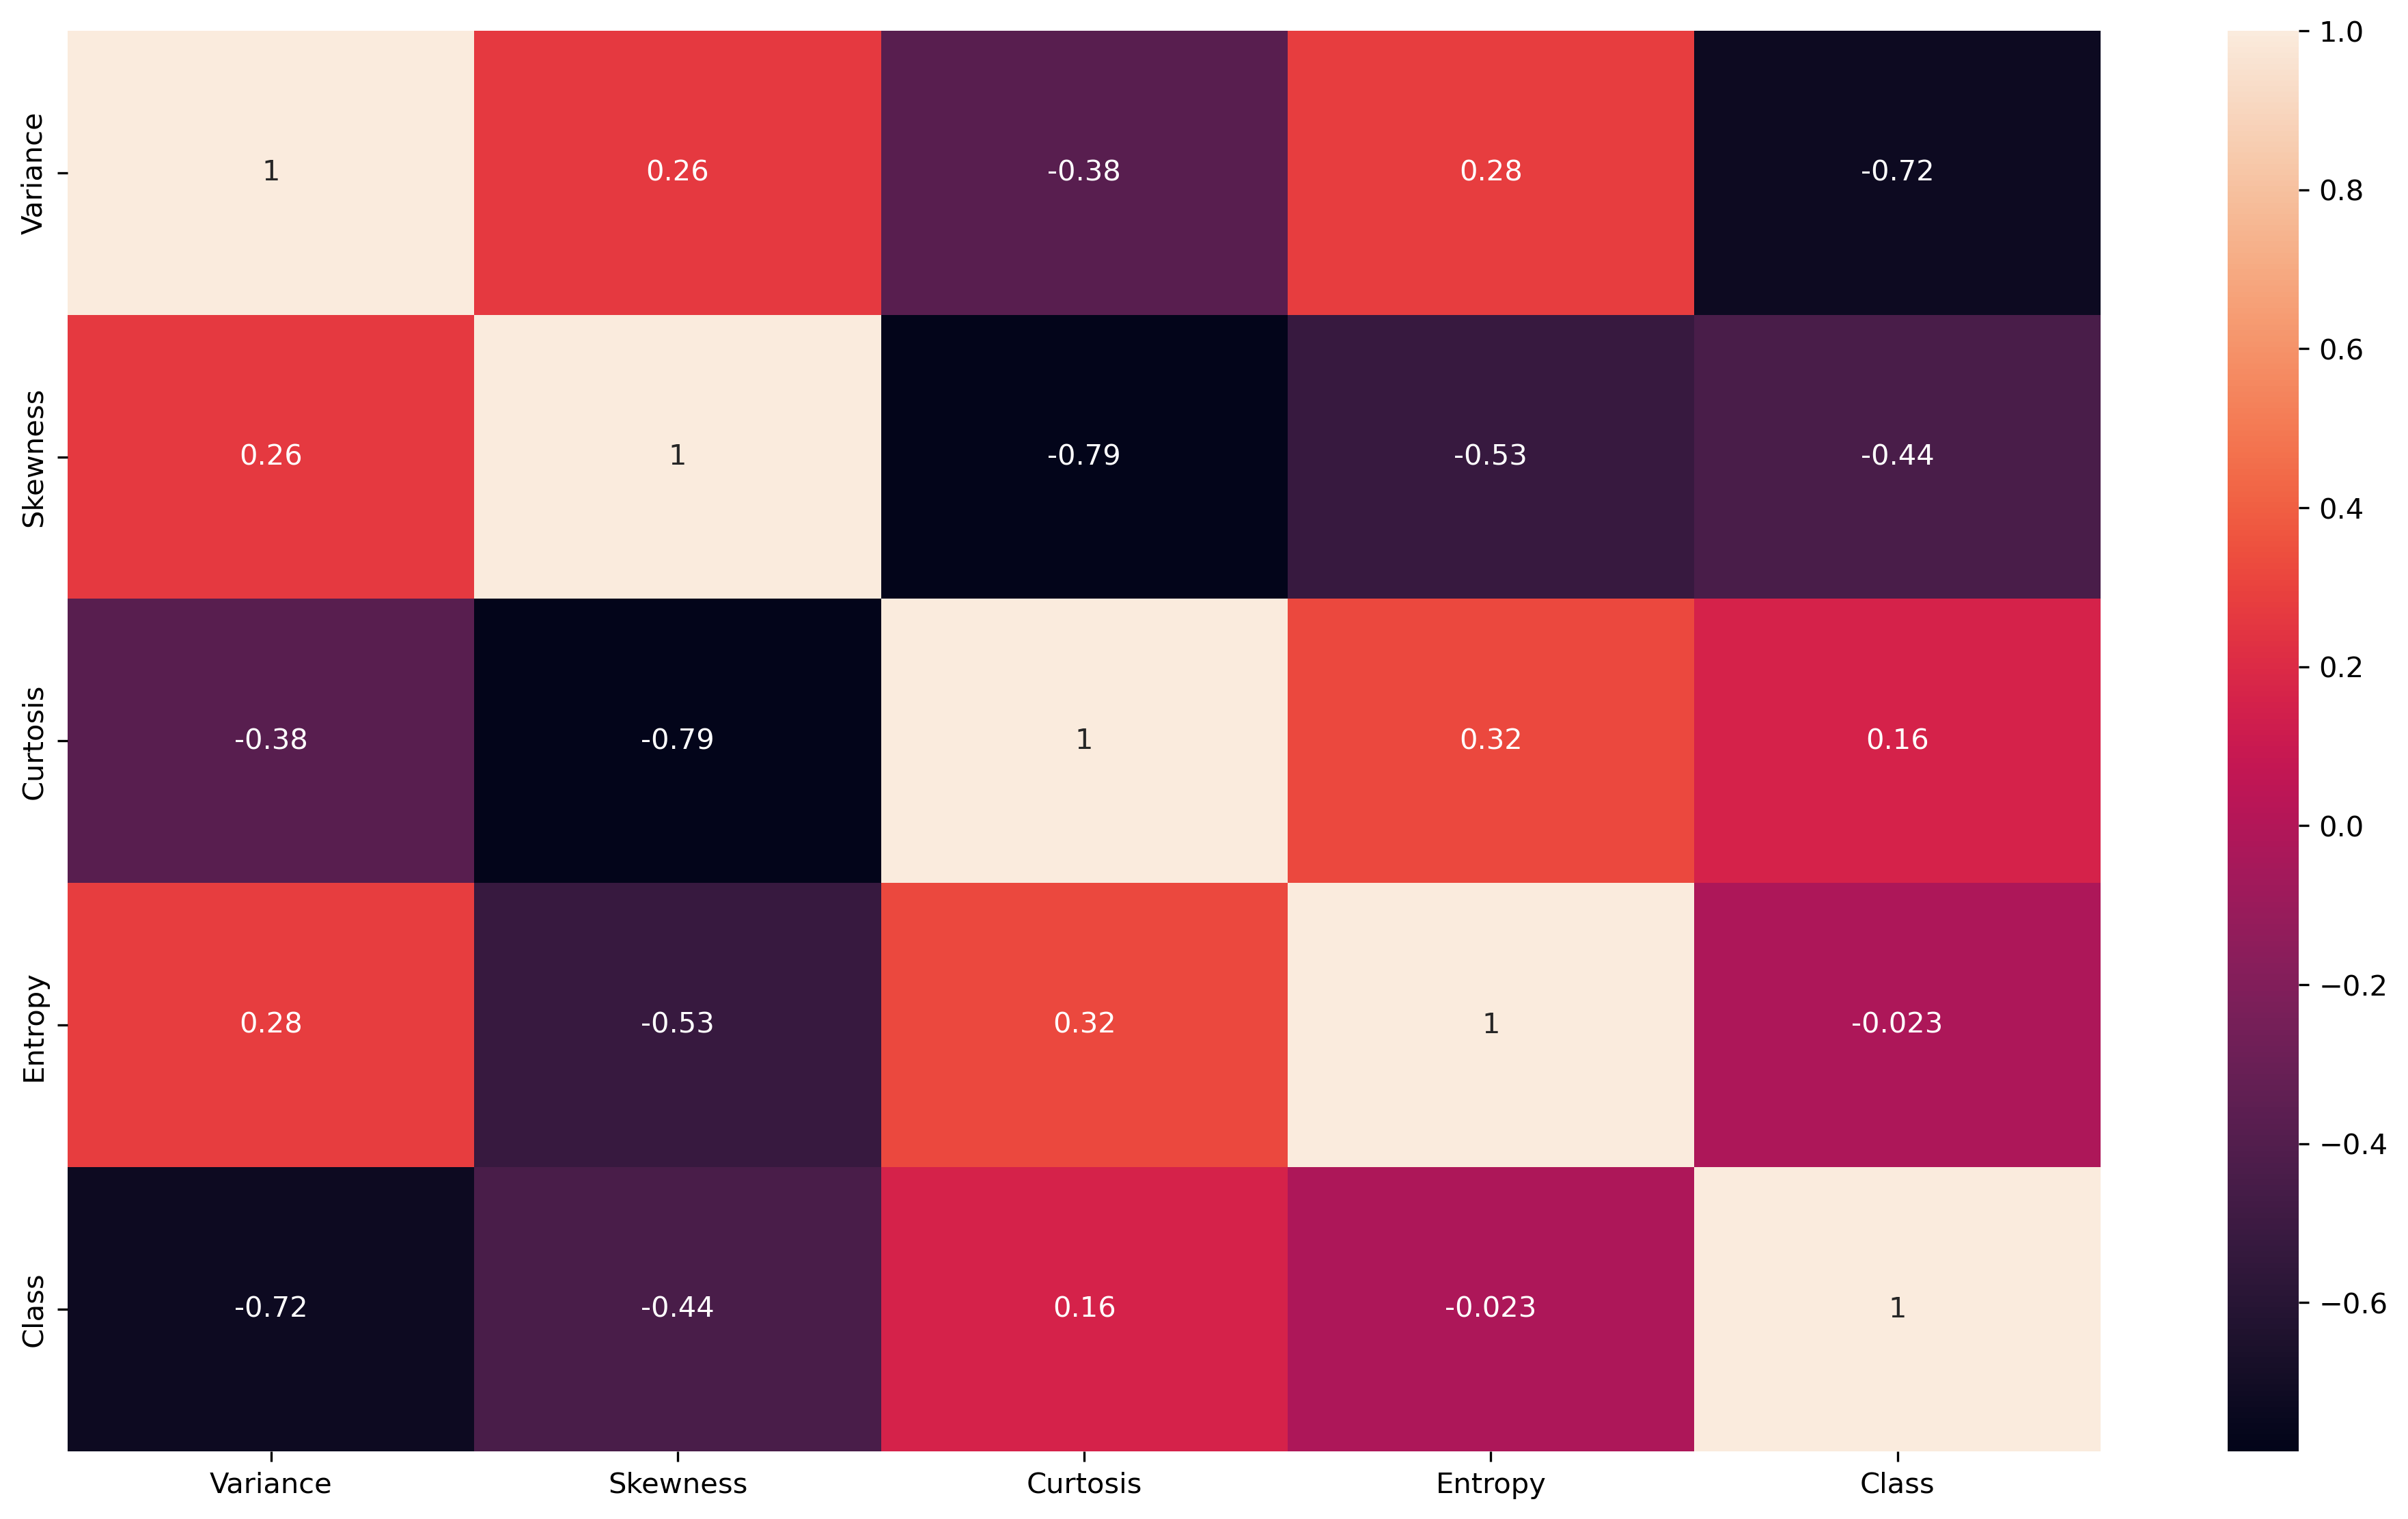

In [4]:
fig = plt.figure(figsize = (16,9) , dpi = 300)  # Finding the correlation between different variables and plotting a heatmap.
sns.heatmap(data.corr(),annot = True) #pearson correlation
plt.show()

In [5]:
x = data.iloc[ : , :-1].values  # Separating dependent and independent data
y = data.iloc[ : , -1].values

In [6]:
print(x)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  # Splitting the data in training and testing dataset

In [8]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0)  # Applying decision classifier using the criteria entropy
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
y_pred2 = clf_entropy.predict(x_test) 
print("Predicted Values : ")
print(y_pred2)

Predicted Values : 
[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1]


In [10]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))  # Creating a Confusion matrix and finding accuracy and report.
print("Accuracy: \n", accuracy_score(y_test, y_pred2)*100)
print("Report: \n", classification_report(y_test, y_pred2))

Confusion Matrix: 
 [[154   3]
 [  1 117]]
Accuracy: 
 98.54545454545455
Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [11]:
xrandom = [[3.62160,8.66610,-2.8073,-0.44699]]  # Testing the algorithm by providing the random values
y_pred = clf_entropy.predict(xrandom)
print(y_pred)

[0]


In [12]:
fig = plt.figure(figsize = (25,20), dpi = 500)  # Plotting the decision tree
a = tree.plot_tree(clf_entropy, feature_names = y, class_names = ["Authentic", "Not Authentic"], filled = True)

In [13]:
from sklearn.ensemble import BaggingClassifier # Using bagging to improve the accuracy.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree = tree.fit(x_train, y_train)
bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, random_state = 0)
bag = bag.fit(x_train, y_train)
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

In [14]:
bag_test = round(accuracy_score(y_test, y_test_pred), 2)*100  # Finding the new accuracy
print(bag_test, "%")

99.0 %
